In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

In [2]:
n = 50
cov_nercome = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_nercome_{n}.matrix")
cov_sample = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_sample_{n}.matrix")

# 'Real' covariance matrix before processing.
# The term 'real' here indicates that this is the matrix that we use to compare
# our estimates to.
cov_real_preproc = np.loadtxt("../data/C_2048_BOSS_DR12_NGC_z1_V6C_1_1_1_1_1_10_200_200_prerecon.matrix")

In [3]:
print(cov_nercome)
print(cov_sample)

[[ 2.18744522e+08  2.62378863e+07 -1.10883968e+07 ... -1.73533226e+05
  -1.79397839e+05 -6.56534646e+04]
 [ 2.62378863e+07  8.02747595e+07  5.52318905e+06 ... -1.41660033e+05
  -1.58719240e+05  8.63165648e+04]
 [-1.10883968e+07  5.52318905e+06  3.03332682e+07 ... -2.48869700e+04
  -1.30947842e+04  6.72111063e+04]
 ...
 [-1.73533226e+05 -1.41660033e+05 -2.48869700e+04 ...  4.52224765e+04
   1.09679945e+04  5.10350367e+03]
 [-1.79397839e+05 -1.58719240e+05 -1.30947842e+04 ...  1.09679945e+04
   4.90803779e+04  1.40595933e+04]
 [-6.56534646e+04  8.63165648e+04  6.72111063e+04 ...  5.10350367e+03
   1.40595933e+04  5.01081393e+04]]
[[ 1.75038962e+08  2.37188969e+07 -8.28981738e+06 ... -1.61908219e+05
  -1.58103402e+05 -1.86439562e+04]
 [ 2.37188969e+07  4.69620115e+07  3.14003876e+06 ... -8.59210065e+04
  -9.92690426e+04  4.61180209e+04]
 [-8.28981738e+06  3.14003876e+06  1.83770376e+07 ... -1.54691877e+04
  -1.03502845e+04  3.72631959e+04]
 ...
 [-1.61908219e+05 -8.59210065e+04 -1.5469187

In [4]:
indices = np.concatenate((np.arange(40), np.arange(40)+80, np.arange(40)+160))
cov_real = (cov_real_preproc[indices, :])[:, indices]

In [5]:
print(cov_real)

[[ 2.39531896e+08  1.91051563e+07  1.44038639e+05 ...  9.68083967e+03
  -1.21684291e+04  2.21567909e+04]
 [ 1.91051563e+07  5.15256710e+07  4.78376836e+06 ...  9.13608077e+03
   9.26311893e+03 -1.41639754e+04]
 [ 1.44038639e+05  4.78376836e+06  1.67772970e+07 ... -5.49127765e+02
  -2.28200815e+03  6.76773412e+03]
 ...
 [ 9.68083967e+03  9.13608077e+03 -5.49127765e+02 ...  4.22979902e+03
   1.28931823e+03  3.78440184e+02]
 [-1.21684291e+04  9.26311893e+03 -2.28200815e+03 ...  1.28931823e+03
   3.88691287e+03  1.00320951e+03]
 [ 2.21567909e+04 -1.41639754e+04  6.76773412e+03 ...  3.78440184e+02
   1.00320951e+03  3.62984716e+03]]


In [6]:
MSE_NERCOME = np.trace((cov_nercome-cov_real)@(cov_nercome-cov_real).T)
MSE_sample = np.trace((cov_sample-cov_real)@(cov_sample-cov_real).T)
print(f"MSE NERCOME: {MSE_NERCOME}")
print(f"MSE sample: {MSE_sample}")

MSE NERCOME: 1.1210432232732653e+17
MSE sample: 9.545880946101682e+16


In [7]:
evals_nercome = np.linalg.eigvalsh(cov_nercome)
evals_sample = np.linalg.eigvalsh(cov_sample)
evals_real = np.linalg.eigvalsh(cov_real)

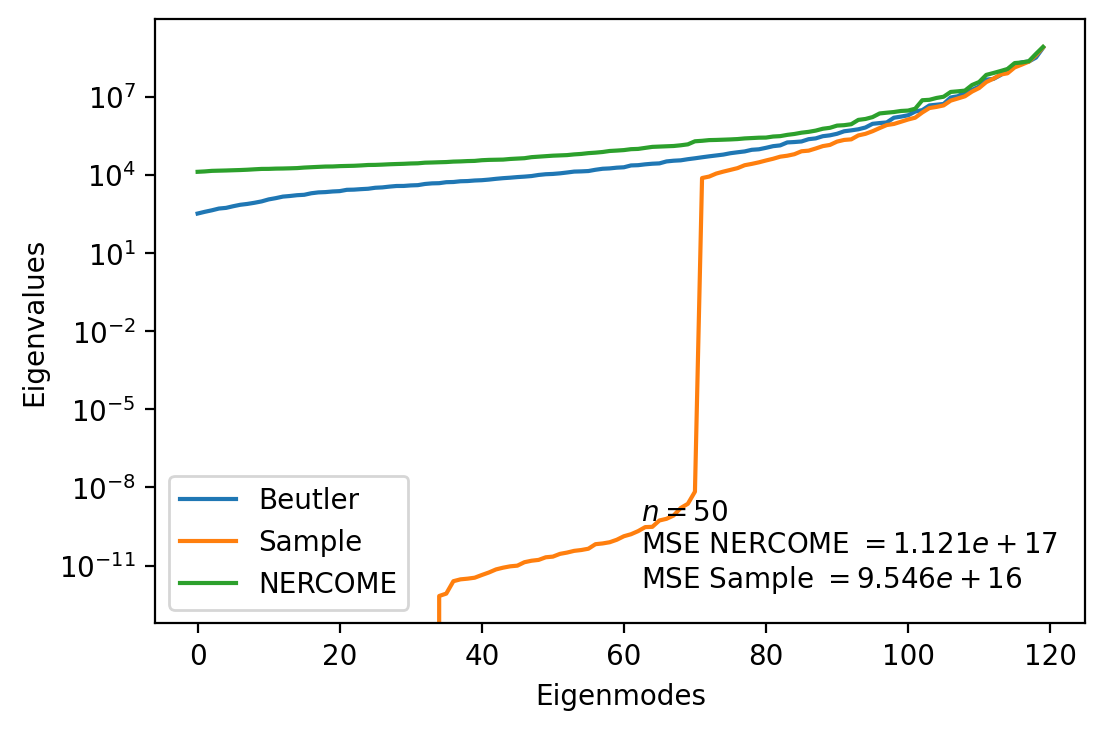

In [8]:
plt.figure(dpi=200)
plt.plot(evals_real, label="Beutler")
plt.plot(evals_sample, label="Sample")
plt.plot(evals_nercome, label="NERCOME")
plt.yscale("log")
plt.legend()
plt.xlabel("Eigenmodes")
plt.ylabel("Eigenvalues")

parameters = AnchoredText(
    fr"$n = {n}$" "\n"
    fr"MSE NERCOME $= {np.format_float_scientific(MSE_NERCOME, precision=3)}$" "\n"
    fr"MSE Sample $={np.format_float_scientific(MSE_sample, precision=3)}$",
    frameon=False, loc="lower right", pad=0.5)
plt.setp(parameters.patch, facecolor='white', alpha=0.5)
plt.gca().add_artist(parameters)

In [9]:
nercome_rel_errors = (cov_nercome-cov_real)/np.abs(cov_real)
print(nercome_rel_errors)

[[ -0.08678332   0.37334057 -77.98209922 ... -18.92543123 -13.7428922
   -3.96313057]
 [  0.37334057   0.55795661   0.15456867 ... -16.50555832 -18.13453551
    7.0940917 ]
 [-77.98209922   0.15456867   0.80799495 ... -44.32090994  -4.73827233
    8.93110915]
 ...
 [-18.92543123 -16.50555832 -44.32090994 ...   9.69140077   7.50681718
   12.48562835]
 [-13.7428922  -18.13453551  -4.73827233 ...   7.50681718  11.62708467
   13.01461321]
 [ -3.96313057   7.0940917    8.93110915 ...  12.48562835  13.01461321
   12.80447634]]


In [10]:
nercome_pos_count = 0
nercome_neg_count = 0
for row in nercome_rel_errors:
    for error in row:
        if error >= 0:
            nercome_pos_count += 1
        elif error < 0:
            nercome_neg_count += 1

print(f"NERCOME overestimated {nercome_pos_count} elements")
print(f"NERCOME underestimated {nercome_neg_count} elements")

index_max_nercome = np.unravel_index(np.abs(nercome_rel_errors).argmax(), nercome_rel_errors.shape)

print(f"Maximum relative error is {nercome_rel_errors[index_max_nercome]}")
print(f"Maximum relative error index is {index_max_nercome}")
print(f"NERCOME: {cov_nercome[index_max_nercome]}, real: {cov_real[index_max_nercome]}")

NERCOME overestimated 7686 elements
NERCOME underestimated 6714 elements
Maximum relative error is 79334.48536598026
Maximum relative error index is (96, 25)
NERCOME: 13359.906062668695, real: -0.168401854538937


In [11]:
sample_rel_errors = (cov_sample-cov_real)/np.abs(cov_real)
print(sample_rel_errors)

[[-2.69245705e-01  2.41491907e-01 -5.85527335e+01 ... -1.77246049e+01
  -1.19929180e+01 -1.84145562e+00]
 [ 2.41491907e-01 -8.85705992e-02 -3.43605600e-01 ... -1.04045804e+01
  -1.17165894e+01  4.25600827e+00]
 [-5.85527335e+01 -3.43605600e-01  9.53515102e-02 ... -2.71704709e+01
  -3.53560365e+00  4.50600766e+00]
 ...
 [-1.77246049e+01 -1.04045804e+01 -2.71704709e+01 ...  1.29544164e-01
   5.10009947e-01  9.50167108e-01]
 [-1.19929180e+01 -1.17165894e+01 -3.53560365e+00 ...  5.10009947e-01
   4.74670540e-02 -2.92785472e-02]
 [-1.84145562e+00  4.25600827e+00  4.50600766e+00 ...  9.50167108e-01
  -2.92785472e-02  1.41029491e-01]]


In [12]:
sample_pos_count = 0
sample_neg_count = 0
for row in sample_rel_errors:
    for error in row:
        if error >= 0:
            sample_pos_count += 1
        elif error < 0:
            sample_neg_count += 1

print(f"Sample overestimated {sample_pos_count} elements")
print(f"Sample underestimated {sample_neg_count} elements")

index_max_sample = np.unravel_index(np.abs(sample_rel_errors).argmax(), sample_rel_errors.shape)

print(f"Maximum relative error is {sample_rel_errors[index_max_sample]}")
print(f"Maximum relative error index is {index_max_sample}")
print(f"Sample: {cov_sample[index_max_sample]}, real: {cov_real[index_max_sample]}")

Sample overestimated 6826 elements
Sample underestimated 7574 elements
Maximum relative error is -62773.13440015017
Maximum relative error index is (80, 94)
Sample: -835867.8448488102, real: -13.315481811674502
